In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [48]:
response = requests.get("https://www.stocklore.ai/api/nse_data.csv?q=JISLJALEQS")
response.status_code

200

In [103]:
a = response.content.decode("utf-8").split("\n")
a = [i.split(",") for i in a]

In [104]:
a[:5]

[['Date', 'Open', 'Close', 'High', 'Low', 'Volume'],
 ['2008-01-01', '645.0', '633.65', '645.0', '630.1', '18870'],
 ['2008-01-02', '646.4', '624.9', '654.0', '618.0', '695259'],
 ['2008-01-03', '630.0', '629.3', '645.0', '625.0', '603275'],
 ['2008-01-04', '640.0', '661.55', '675.0', '640.0', '78347']]

In [105]:
price_df = pd.DataFrame(a[1:-1], columns=a[0])
price_df.iloc[:,1:] = price_df.iloc[:,1:].astype('float')
price_df.head()

,Date,Open,Close,High,Low,Volume
0,2008-01-01,645,633.65,645,630.1,18870
1,2008-01-02,646.4,624.9,654,618,695259
2,2008-01-03,630,629.3,645,625,603275
3,2008-01-04,640,661.55,675,640,78347
4,2008-01-07,651,709,750,645.3,145456


In [106]:
type(price_df['Open'][0])

float

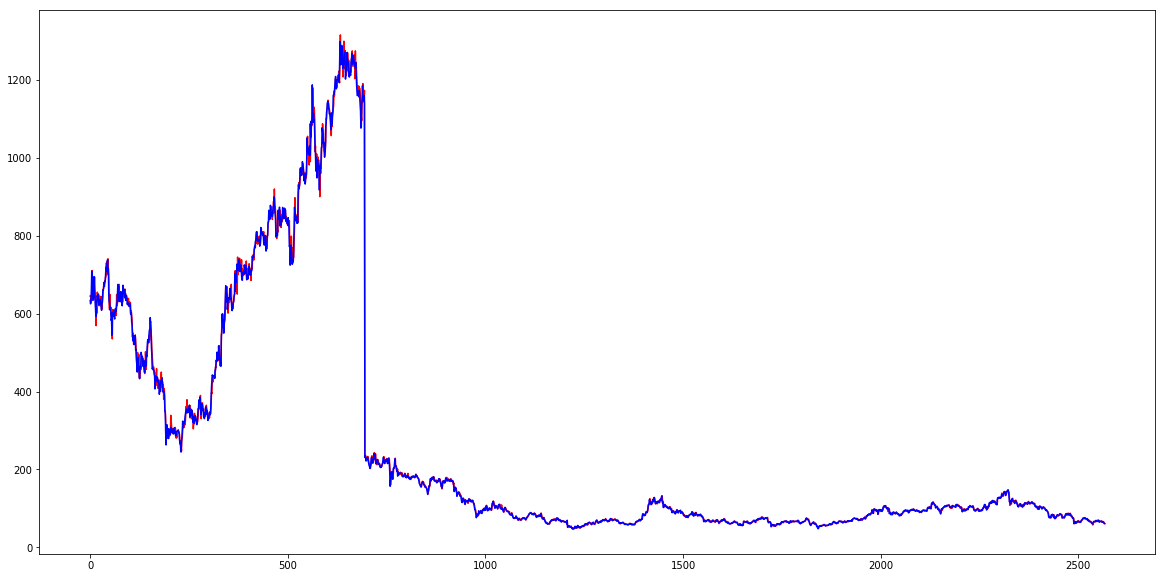

In [107]:
temp_df = price_df.copy()
plt.figure(1, figsize=(20,10))
plt.plot(temp_df['Open'].values, 'r-')
plt.plot(temp_df['Close'].values, 'b-')

In [108]:
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%Y-%m-%d')

In [109]:
path = Path('../Split and bonus data/moneycontrol.com_scrape')
split_df = pd.read_csv(path/"stocks_split_data.csv")
bonus_df = pd.read_csv(path/"bonus_issue_data.csv")

In [110]:
split_df.head()

,Company,OldFV,NewFV,SplitDate
0,Tata Steel,100,10,23-10-1989
1,Reliance Infra,100,10,19-10-1989
2,Greaves Cotton,100,10,25-07-1990
3,Greaves Cotton,100,10,25-07-1990
4,Tayo Rolls,100,10,28-05-1990


In [111]:
bonus_df.head()

,Company,Ratio,AnnouncementDate,RecordDate,Ex-Bonus
0,Premier,1:1,12-01-1987,-,09-12-1986
1,Bosch,1:1,03-09-1986,-,26-09-1986
2,SPIC,1:1,11-09-1986,-,17-06-1986
3,Harrisons Malay,2:5,27-01-1988,-,04-12-1987
4,Futura,1:2,23-08-1986,-,20-11-1987


In [112]:
split_jis = split_df[split_df['Company']=='JISL'].reset_index(drop=True)
split_jis

,Company,OldFV,NewFV,SplitDate
0,JISL,10,2,29-10-2010


In [113]:
bonus_jis = bonus_df[bonus_df['Company']=='JISL'].reset_index(drop=True)
bonus_jis

,Company,Ratio,AnnouncementDate,RecordDate,Ex-Bonus
0,JISL,1:20,27-01-2011,09-11-2011,08-11-2011


In [114]:
split_jis['SplitDate'] = pd.to_datetime(split_jis['SplitDate'], format='%d-%m-%Y')        
bonus_jis['Ex-Bonus'] = pd.to_datetime(bonus_jis['Ex-Bonus'], format='%d-%m-%Y')        

In [115]:
b = price_df[(price_df['Date']>'2010-10-25')&(price_df['Date']<'2010-11-05')]
b

,Date,Open,Close,High,Low,Volume
692,2010-10-26,1157.8,1147.7,1175,1141.6,60404
693,2010-10-27,1156.8,1159.8,1177,1130,134926
694,2010-10-28,1172.65,1138.1,1172.65,1130,250503
695,2010-10-29,230.9,232,235.3,223,363029
696,2010-11-01,235.9,235.05,239.8,232,257602
697,2010-11-02,235.75,228.7,236,227.1,527303
698,2010-11-03,230.9,221.7,233.4,219.2,1.17152e+06
699,2010-11-04,223.75,223.3,229.75,218.3,1.02495e+06


In [116]:
b = price_df[(price_df['Date']>'2011-11-01')&(price_df['Date']<'2011-11-25')]
b

,Date,Open,Close,High,Low,Volume
946,2011-11-02,120.05,117,122.05,115.3,2.08985e+06
947,2011-11-03,117.5,116,117.85,115.25,1.68195e+06
948,2011-11-04,123,111.1,123,108.15,8.34704e+06
949,2011-11-08,109.9,121.4,122.55,107.05,7.63815e+06
950,2011-11-09,122,118.55,124.8,118.05,4.55343e+06
951,2011-11-11,120.1,116.6,120.7,113.65,2.69752e+06
952,2011-11-14,119.2,118.6,121.65,117,2.5527e+06
953,2011-11-15,119.55,119.7,121.5,116.05,3.38406e+06
954,2011-11-16,119.9,118.9,122.9,117.1,1.44502e+06
955,2011-11-17,118.9,115.9,119.1,114.9,633775


In [117]:
bonus_jis['Ratio'] = [ i.split(':') for i in bonus_jis['Ratio']]
#bonus_jis['Factor'] = [ [int(i[0]), int[i[1]]] for i in bonus_jis['Ratio']]
bonus_jis

,Company,Ratio,AnnouncementDate,RecordDate,Ex-Bonus
0,JISL,"[1, 20]",27-01-2011,09-11-2011,2011-11-08


In [118]:
split_jis.iloc[:,1:3] = split_jis.iloc[:,1:3].astype('int')
split_jis

,Company,OldFV,NewFV,SplitDate
0,JISL,10,2,2010-10-29


In [119]:
split_jis['SplitDate']

0   2010-10-29
Name: SplitDate, dtype: datetime64[ns]

In [120]:
for i in range(len(bonus_jis)):
    price_df.loc[price_df['Date']<bonus_jis['Ex-Bonus'][i],['Open', 'Close', 'High', 'Low', 'Volume']] *= (int(bonus_jis['Ratio'][i][1]))/(int(bonus_jis['Ratio'][i][0])+int(bonus_jis['Ratio'][i][1]))

In [121]:
b = price_df[(price_df['Date']>'2011-11-01')&(price_df['Date']<'2011-11-25')]
b

,Date,Open,Close,High,Low,Volume
946,2011-11-02,114.333,111.429,116.238,109.81,1.99033e+06
947,2011-11-03,111.905,110.476,112.238,109.762,1.60186e+06
948,2011-11-04,117.143,105.81,117.143,103,7.94956e+06
949,2011-11-08,109.9,121.4,122.55,107.05,7.63815e+06
950,2011-11-09,122,118.55,124.8,118.05,4.55343e+06
951,2011-11-11,120.1,116.6,120.7,113.65,2.69752e+06
952,2011-11-14,119.2,118.6,121.65,117,2.5527e+06
953,2011-11-15,119.55,119.7,121.5,116.05,3.38406e+06
954,2011-11-16,119.9,118.9,122.9,117.1,1.44502e+06
955,2011-11-17,118.9,115.9,119.1,114.9,633775


In [ ]:
for i in range(len(split_jis)):
    price_df.loc[price_df['Date']<split_jis['Ex-Bonus'][i],['Open', 'Close', 'High', 'Low', 'Volume']] *= (int(bonus_jis['Ratio'][i][1]))/(int(bonus_jis['Ratio'][i][0])+int(bonus_jis['Ratio'][i][1]))

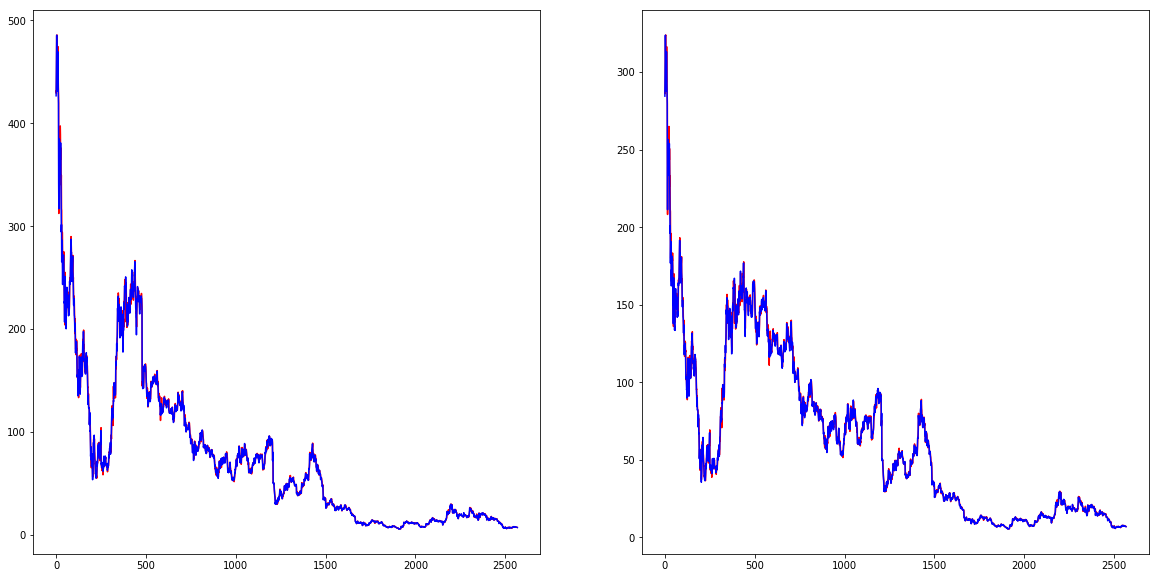

In [30]:
plt.figure(1, figsize=(20,10))
plt.subplot(121)
plt.plot(temp_df['Open'].values, 'r-')
plt.plot(temp_df['Close'].values, 'b-')

plt.subplot(122)
plt.plot(price_df['Open'].values, 'r-')
plt.plot(price_df['Close'].values, 'b-')

In [330]:
price_df.to_csv("normalized_price_tcs.csv", index=False)